In [30]:
from herbie.archive import Herbie
import numpy as np
import pandas as pd

In [45]:
H = Herbie('2022-01-26', model='ecmwf', product='oper', fxx=12)
ds1 = H.xarray(':2t:', remove_grib=False)
ds2 = H.xarray(':10(u|v):')
ds3 = H.xarray(':tp:')


🏋🏻‍♂️ Found 2022-Jan-26 00:00 UTC F12 [ECMWF] [product=oper] GRIB2 file from azure and index file from azure.                                                                                                                                                       
📇 Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=35  :2t:sfc:g:0001:od:fc:oper


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:696: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


📇 Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=33  :10u:sfc:g:0001:od:fc:oper
   2: GRIB_message=42  :10v:sfc:g:0001:od:fc:oper
📇 Download subset: [ECMWF] model [oper] product run at 2022-Jan-26 00:00 UTC F12                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/oper/20220126000000-12h-oper-fc.grib2
   1: GRIB_message=18  :tp:sfc:g:0001:od:fc:oper


In [23]:
ds2.u10**2

<xarray.DataArray 'u10' (latitude: 451, longitude: 900)>
array([[38.16478  , 38.16478  , 38.16478  , ..., 38.16478  , 38.16478  ,
        38.16478  ],
       [13.554253 , 13.211299 , 12.87274  , ..., 14.49028  , 14.135608 ,
        13.901601 ],
       [15.212809 , 14.849347 , 14.609481 , ..., 15.952915 , 15.70426  ,
        15.457558 ],
       ...,
       [ 3.306542 ,  3.2499614,  3.193869 , ...,  3.656279 ,  3.537747 ,
         3.4211679],
       [ 4.278237 ,  4.213844 ,  4.149939 , ...,  4.540692 ,  4.4743457,
         4.343118 ],
       [ 6.69702  ,  6.69702  ,  6.69702  , ...,  6.69702  ,  6.69702  ,
         6.69702  ]], dtype=float32)
Coordinates:
    time               datetime64[ns] 2022-01-26
    step               timedelta64[ns] 12:00:00
    heightAboveGround  float64 10.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         datetime64[ns] 2022-01-26T12:00:00

In [24]:
ds_speed = np.sqrt(ds2.u10**2 + ds2.v10**2)

In [27]:
ds3.unknown

<xarray.DataArray 'unknown' (latitude: 451, longitude: 900)>
array([[9.5367432e-05, 9.5367432e-05, 9.5367432e-05, ..., 9.5367432e-05,
        9.5367432e-05, 9.5367432e-05],
       [1.2969971e-04, 1.2969971e-04, 1.2969971e-04, ..., 1.2588501e-04,
        1.2969971e-04, 1.2969971e-04],
       [1.7547607e-04, 1.7929077e-04, 1.7929077e-04, ..., 1.7166138e-04,
        1.7166138e-04, 1.7547607e-04],
       ...,
       [1.1444092e-05, 1.1444092e-05, 1.1444092e-05, ..., 1.1444092e-05,
        1.1444092e-05, 1.1444092e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.9591064e-05, 4.9591064e-05, 4.9591064e-05, ..., 4.9591064e-05,
        4.9591064e-05, 4.9591064e-05]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2022-01-26
    step        timedelta64[ns] 12:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * longitude   (longitude) float64 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
    valid_time  datetime64[ns] 2022-01-26T12:00:00
Attributes: (12/33)
    GRIB_paramId:                             0
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      405900
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_stepRange:                           0-12
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown
    grid_mapping:                             gribfile_projection

In [44]:
# convert xarray DataSet to Pandas DataFrame, and unstack it (convert 2D array to 1D)
air_temp = ds1['t2m'].to_pandas().unstack()
spd = ds_speed.to_pandas().unstack()
tp = ds3['unknown'].to_pandas().unstack()

# Build a new DataFrame
new_df = pd.concat(dict(
    air_temperature=air_temp,
    wind_speed=spd,
    total_precipitation=tp
), axis=1)

#new_df.to_csv('from_grib.csv')

In [36]:
new

air_temperature  wind_speed  total_precipitation
longitude latitude                                                  
-180.0     90.0          247.678574    7.689886             0.000095
           89.6          247.991074    7.403326             0.000130
           89.2          248.334824    7.131077             0.000175
           88.8          248.584824    6.872754             0.000217
           88.4          248.647324    6.621660             0.000256
...                             ...         ...                  ...
 179.6    -88.4          242.647324    4.345257             0.000023
          -88.8          242.897324    3.711484             0.000015
          -89.2          243.428574    3.618895             0.000011
          -89.6          244.584824    3.927729             0.000000
          -90.0          245.459824    3.399376             0.000050

[405900 rows x 3 columns]

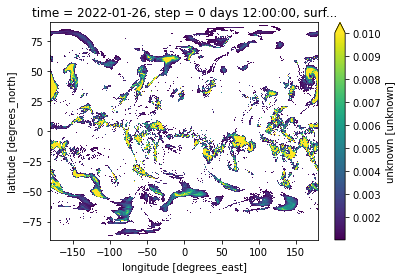

In [43]:
ds3.unknown.where(ds3.unknown>0.001).plot(vmax=.01)